# **Generacion datos**
## Desarrollado por Jesus David Gomez Osorno
## Universidad de Antioquia

## Carga de datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
RUTA_DATA = '/content/drive/MyDrive/Monografía/data'

In [3]:
DEPARTAMENTO = 'DEPARTAMENTO'
MUNICIPIO = 'MUNICIPIO'
GRUPO_CULTIVO = 'GRUPO_CULTIVO'
CULTIVO = 'CULTIVO'
AREA_SEMBRADA = 'AREA_SEMBRADA'
AREA_COSECHADA = 'AREA_COSECHADA'
PRODUCCION = 'PRODUCCION'
ESTADO_FISICO_PRODUCCION = 'ESTADO_FISICO_PRODUCCION'
CICLO_CULTIVO = 'CICLO_CULTIVO'

In [4]:
columns = [
            DEPARTAMENTO,
            MUNICIPIO,
            GRUPO_CULTIVO,
            CULTIVO,
            AREA_SEMBRADA,
            AREA_COSECHADA,
            PRODUCCION,            
            ESTADO_FISICO_PRODUCCION,
            CICLO_CULTIVO
          ]

columns_feature = [
            DEPARTAMENTO,
            MUNICIPIO,
            GRUPO_CULTIVO,
            CULTIVO,
            AREA_COSECHADA,
            PRODUCCION,            
            ESTADO_FISICO_PRODUCCION,
            CICLO_CULTIVO
          ]

In [5]:
import pandas as pd
import numpy as np

agricultor = 'grandes'
url_grandes_agricultores = RUTA_DATA + '/originales/grandes_agricultores.csv'

In [6]:
grandes_agricultores = pd.read_csv(url_grandes_agricultores, header = None, index_col= False, names = columns)
data_after = grandes_agricultores.drop([0],axis=0)
data_after

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,DEPARTAMENTO,MUNICIPIO,GRUPO_CULTIVO,CULTIVO,AREA_SEMBRADA,AREA_COSECHADA,PRODUCCION,ESTADO_FISICO_PRODUCCION,CICLO_CULTIVO
1,1.300000000000000000e+01,8.490000000000000000e+02,6.000000000000000000e+00,0.000000000000000000e+00,8.200000000000000000e+01,8.000000000000000000e+01,1.440000000000000000e+03,7.000000000000000000e+00,2.000000000000000000e+00
2,1.300000000000000000e+01,8.490000000000000000e+02,6.000000000000000000e+00,0.000000000000000000e+00,7.200000000000000000e+01,7.000000000000000000e+01,1.260000000000000000e+03,7.000000000000000000e+00,2.000000000000000000e+00
3,1.300000000000000000e+01,8.490000000000000000e+02,6.000000000000000000e+00,0.000000000000000000e+00,6.200000000000000000e+01,6.000000000000000000e+01,1.080000000000000000e+03,7.000000000000000000e+00,2.000000000000000000e+00
4,1.300000000000000000e+01,8.490000000000000000e+02,6.000000000000000000e+00,0.000000000000000000e+00,6.200000000000000000e+01,6.000000000000000000e+01,1.080000000000000000e+03,7.000000000000000000e+00,2.000000000000000000e+00
5,1.300000000000000000e+01,8.490000000000000000e+02,6.000000000000000000e+00,0.000000000000000000e+00,6.500000000000000000e+01,6.100000000000000000e+01,1.098000000000000000e+03,7.000000000000000000e+00,2.000000000000000000e+00
...,...,...,...,...,...,...,...,...,...
148950,27.0,367.0,4.0,219.0,58.0,51.0,342.0,7.0,1.0
148951,29.0,407.0,4.0,219.0,13.0,13.0,75.0,7.0,1.0
148952,13.0,496.0,6.0,44.0,20.0,19.0,399.0,12.0,2.0
148953,13.0,496.0,6.0,44.0,20.0,18.0,180.0,12.0,2.0


## Funciones

In [ ]:
import seaborn as sns # Librería de visualización para data science

def diagrama_blox_plot(data):
  sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
  sns.set(style="whitegrid") # Estilo de la figura
  sns.boxplot(data = data, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot con los datos con normalización Min-Max

In [ ]:
import seaborn as sns # Librería de visualización para data science

def diagrama_vigotes(data):
  sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
  sns.set(style="whitegrid") # Estilo de la figura
  sns.violinplot(data = data, linewidth = 1, palette="Set2", fliersize = 2)
  sns.despine(offset=10, trim=True);

## Escalamiento 

### Escalamiento robusto

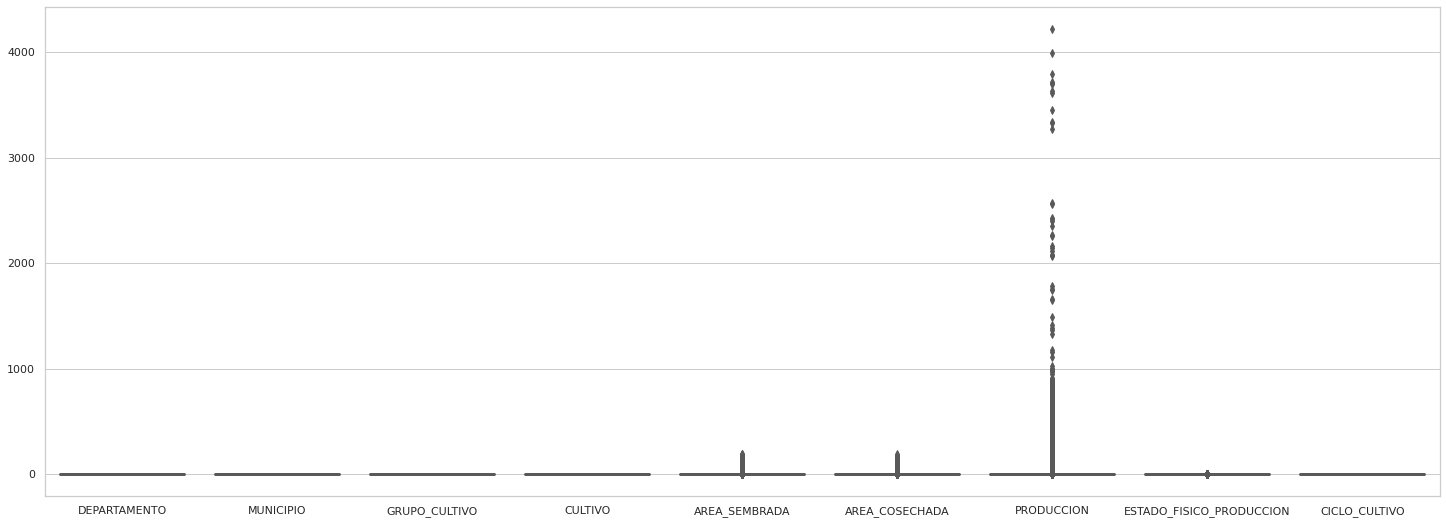

In [ ]:
from sklearn.preprocessing import RobustScaler # Escalamiento robusto

RS_1 = RobustScaler(quantile_range = (15, 75)) # (Primer cuartil, tercer cuartil)

Datos_RS_1 = RS_1.fit_transform(data_after)
Datos_RS_1 = pd.DataFrame(data = Datos_RS_1, columns=columns)

diagrama_blox_plot(Datos_RS_1)

In [ ]:
np.savetxt(RUTA_DATA + '/' + agricultor + '/' + 'robusto_original' + '.csv', Datos_RS_1, delimiter=',')

### Escalamiento estándar

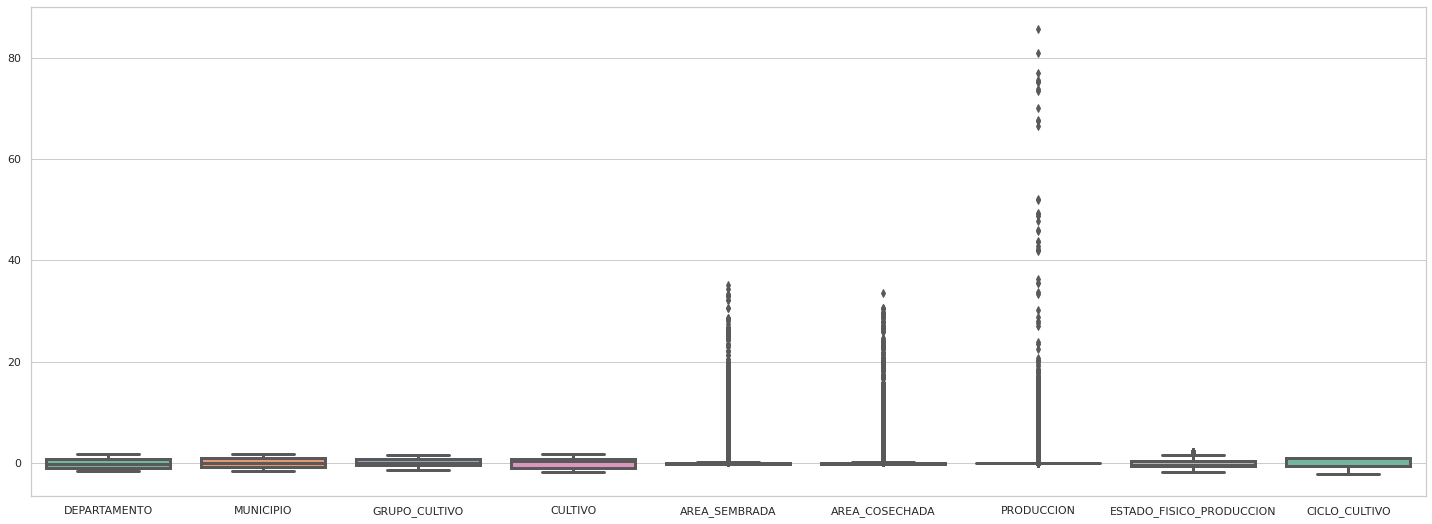

In [ ]:
from sklearn.preprocessing import StandardScaler # Escalamiento estándar

SS = StandardScaler()

Datos_Escalados_Estandar = SS.fit_transform(data_after) 
Datos_Escalados_Estandar = pd.DataFrame(data = Datos_Escalados_Estandar, columns = columns)

diagrama_blox_plot(Datos_Escalados_Estandar)

In [ ]:
np.savetxt(RUTA_DATA + '/' + agricultor + '/' + 'estandar_original' + '.csv', Datos_Escalados_Estandar, delimiter=',')

### Escalamiento normalizado MIN - MAX

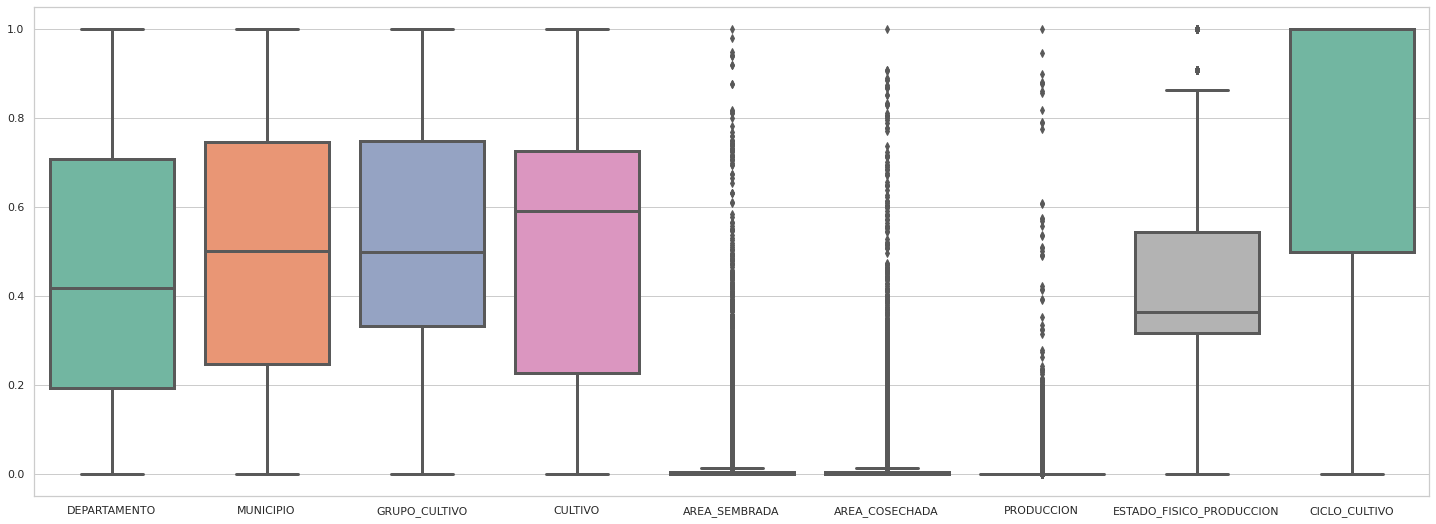

In [ ]:
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler es una librería que permite hacer diferentes escalas de los datos cuando ajustes de valores máximos y mínimos.

MinMax_1 = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1

Datos_Min_Max = MinMax_1.fit_transform(data_after) # Transformación de los nuevos datos con una escala MinMax
Datos_Min_Max = pd.DataFrame(data = Datos_Min_Max, columns = columns)

diagrama_blox_plot(Datos_Min_Max)

In [ ]:
np.savetxt(RUTA_DATA + '/' + agricultor + '/' + 'min_max_original' + '.csv', Datos_Min_Max, delimiter=',')

### Escalamiento máxima normalización

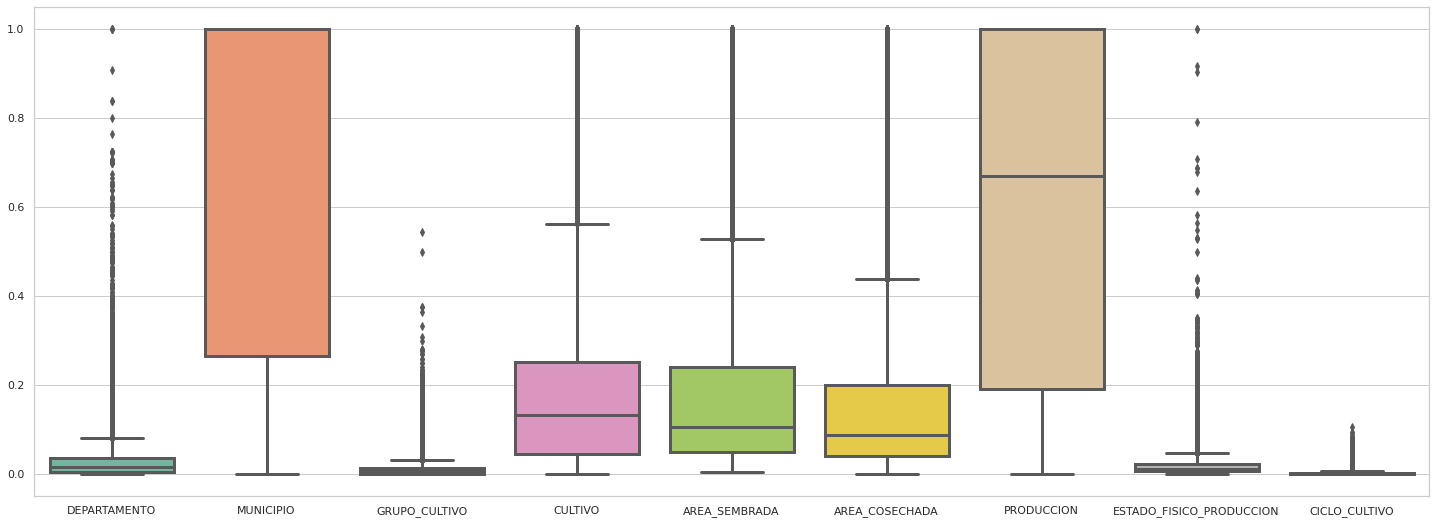

In [ ]:
from sklearn.preprocessing import Normalizer # Librería para normalizar datos en una escala deseada

NM = Normalizer(norm ='max') # Método de maxima normalización

Datos_NM = NM.fit_transform(data_after)
Datos_NM = pd.DataFrame(data = Datos_NM, columns = columns)

diagrama_blox_plot(Datos_NM)

In [ ]:
np.savetxt(RUTA_DATA + '/' + agricultor + '/' + 'max_normalizacion_original' + '.csv', Datos_NM, delimiter=',')

Una vez que tenemos nuestra base de datos definitiva, vamos a observar si hay datos atípicos y de tenerlos, eliminarlos.

## LOF FUNCION

In [ ]:
from sklearn.neighbors import LocalOutlierFactor # detección de outlers no supervisado basado en LOF
from matplotlib import pyplot # Librería para hacer gráficas

def detecta_atipicos_lof(metric, n_neighbors, data_original, save_data, sub_name, escalamiento):
  name = escalamiento +'_lof_' + str(metric) + '_' + str(n_neighbors)
  print(name)
  LOF = LocalOutlierFactor(n_neighbors = n_neighbors, algorithm = 'auto', metric = metric) # OJO, usar un número de vecinos más cercano con números impares.
  Filtrado = LOF.fit_predict(data_original) # Se realiza la predicción de los datos atípicos
  NOF = LOF.negative_outlier_factor_ # Detecta los valores positivos y negativos (residuos). Si los valores son grandes, entonces son valores no atípicos y por lo general, son valores cercanos a -1.
                                    # Si los valores son positivos y grandes y cercanos a 1, entonces son valores atípicos. La opción negative_outlier_dactor_ calcula dichos valores por 
                                    # la media de la relación entre la densidad local de una muestra y las de sus vecinos más cercanos.

  radio_outiler = (NOF.max() - NOF)/(NOF.max() - NOF.min()) # radio de detección de datos atípicos

  
  ground_truth = np.ones(len(data_original), dtype = int) # Se recomienda para luego comparar que datos es o no atípico (genera un vector de 1 o -1)
  n_errors = (Filtrado != ground_truth).sum() # número de datos atípicos

  pos = np.where(Filtrado == ground_truth) # Se identifican en que muestras o filas de nuestra base de datos hay presencia de datos atípicos
  pos = np.asarray(pos)
  pos = np.hstack(pos)
  datos_sin_outilers = data_original.loc[pos, :]

  if save_data:
    np.savetxt(RUTA_DATA + '/' + sub_name + '/' + name + '.csv', datos_sin_outilers, delimiter=',')

  return { 'nombre': name, '#vecinos': n_neighbors, 'metrica': metric, '#muestras': data_original.shape[0], '#atipicos': n_errors, '#muestras_sin_atipicos': datos_sin_outilers.shape[0]}, datos_sin_outilers

###LOF CON DATOS ESCALADOS CON ROBUSTO

In [ ]:
columns_resultados_lof = ['nombre', '#vecinos', 'metrica', '#muestras', '#atipicos', '#muestras_sin_atipicos']
df_resultados_configuraciones = pd.DataFrame(columns=columns_resultados_lof, index=None)

numerosVecinos = [5, 7, 9, 11]
metricas = ['euclidean', 'minkowski', 'manhattan']

for numeroVecino in numerosVecinos:
  for metrica in metricas:
    result, data = detecta_atipicos_lof(metrica, numeroVecino, Datos_RS_1, True, agricultor, 'robusto')
    df_resultados_configuraciones = df_resultados_configuraciones.append(result, ignore_index=True)

robusto_lof_euclidean_5
robusto_lof_minkowski_5
robusto_lof_manhattan_5
robusto_lof_euclidean_7
robusto_lof_minkowski_7
robusto_lof_manhattan_7
robusto_lof_euclidean_9
robusto_lof_minkowski_9
robusto_lof_manhattan_9
robusto_lof_euclidean_11
robusto_lof_minkowski_11
robusto_lof_manhattan_11


In [ ]:
df_resultados_configuraciones.sort_values('#atipicos')

,nombre,#vecinos,metrica,#muestras,#atipicos,#muestras_sin_atipicos
9,robusto_lof_euclidean_11,11,euclidean,148954,6612,142342
10,robusto_lof_minkowski_11,11,minkowski,148954,6612,142342
11,robusto_lof_manhattan_11,11,manhattan,148954,7903,141051
6,robusto_lof_euclidean_9,9,euclidean,148954,8147,140807
7,robusto_lof_minkowski_9,9,minkowski,148954,8147,140807
8,robusto_lof_manhattan_9,9,manhattan,148954,9654,139300
3,robusto_lof_euclidean_7,7,euclidean,148954,10507,138447
4,robusto_lof_minkowski_7,7,minkowski,148954,10507,138447
5,robusto_lof_manhattan_7,7,manhattan,148954,12429,136525
0,robusto_lof_euclidean_5,5,euclidean,148954,14632,134322


###LOF CON DATOS ESCALADOS CON ESTANDAR

In [ ]:
columns_resultados_lof = ['nombre', '#vecinos', 'metrica', '#muestras', '#atipicos', '#muestras_sin_atipicos']
df_resultados_configuraciones = pd.DataFrame(columns=columns_resultados_lof, index=None)

numerosVecinos = [5, 7, 9, 11]
metricas = ['euclidean', 'minkowski', 'manhattan']

for numeroVecino in numerosVecinos:
  for metrica in metricas:
    result, data = detecta_atipicos_lof(metrica, numeroVecino, Datos_Escalados_Estandar, True, agricultor, 'estandar')
    df_resultados_configuraciones = df_resultados_configuraciones.append(result, ignore_index=True)

estandar_lof_euclidean_5
estandar_lof_minkowski_5
estandar_lof_manhattan_5
estandar_lof_euclidean_7
estandar_lof_minkowski_7
estandar_lof_manhattan_7
estandar_lof_euclidean_9
estandar_lof_minkowski_9
estandar_lof_manhattan_9
estandar_lof_euclidean_11
estandar_lof_minkowski_11
estandar_lof_manhattan_11


In [ ]:
df_resultados_configuraciones.sort_values('#atipicos')

,nombre,#vecinos,metrica,#muestras,#atipicos,#muestras_sin_atipicos
9,estandar_lof_euclidean_11,11,euclidean,148954,20177,128777
10,estandar_lof_minkowski_11,11,minkowski,148954,20177,128777
11,estandar_lof_manhattan_11,11,manhattan,148954,20478,128476
6,estandar_lof_euclidean_9,9,euclidean,148954,22289,126665
7,estandar_lof_minkowski_9,9,minkowski,148954,22289,126665
8,estandar_lof_manhattan_9,9,manhattan,148954,22517,126437
3,estandar_lof_euclidean_7,7,euclidean,148954,24726,124228
4,estandar_lof_minkowski_7,7,minkowski,148954,24726,124228
5,estandar_lof_manhattan_7,7,manhattan,148954,25262,123692
0,estandar_lof_euclidean_5,5,euclidean,148954,27894,121060


###LOF CON DATOS ESCALADOS CON NORMALIZADO MIN-MAX

In [ ]:
columns_resultados_lof = ['nombre', '#vecinos', 'metrica', '#muestras', '#atipicos', '#muestras_sin_atipicos']
df_resultados_configuraciones = pd.DataFrame(columns=columns_resultados_lof, index=None)

numerosVecinos = [5, 7, 9, 11]
metricas = ['euclidean', 'minkowski', 'manhattan']

for numeroVecino in numerosVecinos:
  for metrica in metricas:
    result, data = detecta_atipicos_lof(metrica, numeroVecino, Datos_Min_Max, True, agricultor, 'min_max')
    df_resultados_configuraciones = df_resultados_configuraciones.append(result, ignore_index=True)


min_max_lof_euclidean_5
min_max_lof_minkowski_5
min_max_lof_manhattan_5
min_max_lof_euclidean_7
min_max_lof_minkowski_7
min_max_lof_manhattan_7
min_max_lof_euclidean_9
min_max_lof_minkowski_9
min_max_lof_manhattan_9
min_max_lof_euclidean_11
min_max_lof_minkowski_11
min_max_lof_manhattan_11


In [ ]:
df_resultados_configuraciones.sort_values('#atipicos')

,nombre,#vecinos,metrica,#muestras,#atipicos,#muestras_sin_atipicos
11,min_max_lof_manhattan_11,11,manhattan,148954,27120,121834
9,min_max_lof_euclidean_11,11,euclidean,148954,27162,121792
10,min_max_lof_minkowski_11,11,minkowski,148954,27162,121792
6,min_max_lof_euclidean_9,9,euclidean,148954,27863,121091
7,min_max_lof_minkowski_9,9,minkowski,148954,27863,121091
8,min_max_lof_manhattan_9,9,manhattan,148954,27915,121039
3,min_max_lof_euclidean_7,7,euclidean,148954,29472,119482
4,min_max_lof_minkowski_7,7,minkowski,148954,29472,119482
5,min_max_lof_manhattan_7,7,manhattan,148954,29472,119482
0,min_max_lof_euclidean_5,5,euclidean,148954,32037,116917


###LOF CON DATOS ESCALADOS CON MAXIMA NORMALIZACION

In [ ]:
columns_resultados_lof = ['nombre', '#vecinos', 'metrica', '#muestras', '#atipicos', '#muestras_sin_atipicos']
df_resultados_configuraciones = pd.DataFrame(columns=columns_resultados_lof, index=None)

numerosVecinos = [5, 7, 9, 11]
metricas = ['euclidean', 'minkowski', 'manhattan']

for numeroVecino in numerosVecinos:
  for metrica in metricas:
    result, data = detecta_atipicos_lof(metrica, numeroVecino, Datos_NM, True, agricultor, 'max_normalizacion')
    df_resultados_configuraciones = df_resultados_configuraciones.append(result, ignore_index=True)

max_normalizacion_lof_euclidean_5
max_normalizacion_lof_minkowski_5
max_normalizacion_lof_manhattan_5
max_normalizacion_lof_euclidean_7
max_normalizacion_lof_minkowski_7
max_normalizacion_lof_manhattan_7
max_normalizacion_lof_euclidean_9
max_normalizacion_lof_minkowski_9
max_normalizacion_lof_manhattan_9
max_normalizacion_lof_euclidean_11
max_normalizacion_lof_minkowski_11
max_normalizacion_lof_manhattan_11


In [ ]:
df_resultados_configuraciones.sort_values('#atipicos')

,nombre,#vecinos,metrica,#muestras,#atipicos,#muestras_sin_atipicos
9,max_normalizacion_lof_euclidean_11,11,euclidean,148954,2305,146649
10,max_normalizacion_lof_minkowski_11,11,minkowski,148954,2305,146649
6,max_normalizacion_lof_euclidean_9,9,euclidean,148954,2835,146119
7,max_normalizacion_lof_minkowski_9,9,minkowski,148954,2835,146119
11,max_normalizacion_lof_manhattan_11,11,manhattan,148954,3488,145466
3,max_normalizacion_lof_euclidean_7,7,euclidean,148954,3838,145116
4,max_normalizacion_lof_minkowski_7,7,minkowski,148954,3838,145116
8,max_normalizacion_lof_manhattan_9,9,manhattan,148954,4362,144592
5,max_normalizacion_lof_manhattan_7,7,manhattan,148954,5678,143276
0,max_normalizacion_lof_euclidean_5,5,euclidean,148954,6400,142554


## AISLAMIENTO FORESTAL FUNCION

In [ ]:
from sklearn.ensemble import IsolationForest # algoritmo de aislamiento forestal
from matplotlib import pyplot as plt
import numpy as np

def detecta_atipicos_isf(n_estimators, contamination, data_original, save_data, sub_name, escalamiento):
  name = escalamiento + '_isf_' + str(n_estimators) + '_' + str(contamination).replace(".", "_")
  print(name)

  ISF = IsolationForest(n_estimators = n_estimators, max_samples = 'auto', contamination = contamination, random_state = 17)
  DA = ISF.fit_predict(data_original.to_numpy())

  ground_truth = np.ones(len(data_original), dtype = int)
  n_error = (DA != ground_truth).sum() # número de datos atípicos

  pos = np.where(DA == ground_truth) # Se identifican en que muestras o filas de nuestra base de datos hay presencia de datos atípicos
  pos = np.asarray(pos)
  pos = np.hstack(pos)
  datos_sin_outilers_IF = data_original.loc[pos, :]

  if save_data:
    np.savetxt(RUTA_DATA + '/' + sub_name + '/' + name + '.csv', datos_sin_outilers_IF, delimiter=',')

  return { 'nombre': name, '#estimadores': n_estimators, 'contaminacion': contamination, '#muestras': data_original.shape[0], '#atipicos': n_error, '#muestras_sin_atipicos': datos_sin_outilers_IF.shape[0]}, datos_sin_outilers_IF

###AISLAMIENTO FORESTAL CON DATOS ESCALADOS CON ROBUSTO

In [ ]:
columns_resultados_isf = ['nombre', '#estimadores', 'contaminacion', '#muestras', '#atipicos', '#muestras_sin_atipicos']
df_resultados_configuraciones = pd.DataFrame(columns=columns_resultados_isf, index=None)

estimadores = [100, 200, 300, 400]
contaminaciones = ['auto', 0.05, 0.10, 0.15, 0.20]

for estimador in estimadores:
  for contaminacion in contaminaciones:
    result, data = detecta_atipicos_isf(estimador, contaminacion, Datos_RS_1, True, agricultor, 'robusto')
    df_resultados_configuraciones = df_resultados_configuraciones.append(result, ignore_index=True)

robusto_isf_100_auto
robusto_isf_100_0_05
robusto_isf_100_0_1
robusto_isf_100_0_15
robusto_isf_100_0_2
robusto_isf_200_auto
robusto_isf_200_0_05
robusto_isf_200_0_1
robusto_isf_200_0_15
robusto_isf_200_0_2
robusto_isf_300_auto
robusto_isf_300_0_05
robusto_isf_300_0_1
robusto_isf_300_0_15
robusto_isf_300_0_2
robusto_isf_400_auto
robusto_isf_400_0_05
robusto_isf_400_0_1
robusto_isf_400_0_15
robusto_isf_400_0_2


In [ ]:
df_resultados_configuraciones.sort_values('#atipicos')

,nombre,#estimadores,contaminacion,#muestras,#atipicos,#muestras_sin_atipicos
1,robusto_isf_100_0_05,100,0.05,148954,7448,141506
16,robusto_isf_400_0_05,400,0.05,148954,7448,141506
6,robusto_isf_200_0_05,200,0.05,148954,7448,141506
11,robusto_isf_300_0_05,300,0.05,148954,7448,141506
7,robusto_isf_200_0_1,200,0.1,148954,14895,134059
2,robusto_isf_100_0_1,100,0.1,148954,14896,134058
17,robusto_isf_400_0_1,400,0.1,148954,14896,134058
12,robusto_isf_300_0_1,300,0.1,148954,14896,134058
3,robusto_isf_100_0_15,100,0.15,148954,22343,126611
8,robusto_isf_200_0_15,200,0.15,148954,22343,126611


###AISLAMIENTO FORESTAL CON DATOS ESCALADOS CON ESTANDAR

In [ ]:
columns_resultados_isf = ['nombre', '#estimadores', 'contaminacion', '#muestras', '#atipicos', '#muestras_sin_atipicos']
df_resultados_configuraciones = pd.DataFrame(columns=columns_resultados_isf, index=None)

estimadores = [100, 200, 300, 400]
contaminaciones = ['auto', 0.05, 0.10, 0.15, 0.20]

for estimador in estimadores:
  for contaminacion in contaminaciones:
    result, data = detecta_atipicos_isf(estimador, contaminacion, Datos_Escalados_Estandar, True, agricultor, 'estandar')
    df_resultados_configuraciones = df_resultados_configuraciones.append(result, ignore_index=True)

estandar_isf_100_auto
estandar_isf_100_0_05
estandar_isf_100_0_1
estandar_isf_100_0_15
estandar_isf_100_0_2
estandar_isf_200_auto
estandar_isf_200_0_05
estandar_isf_200_0_1
estandar_isf_200_0_15
estandar_isf_200_0_2
estandar_isf_300_auto
estandar_isf_300_0_05
estandar_isf_300_0_1
estandar_isf_300_0_15
estandar_isf_300_0_2
estandar_isf_400_auto
estandar_isf_400_0_05
estandar_isf_400_0_1
estandar_isf_400_0_15
estandar_isf_400_0_2


In [ ]:
df_resultados_configuraciones.sort_values('#atipicos')

,nombre,#estimadores,contaminacion,#muestras,#atipicos,#muestras_sin_atipicos
1,estandar_isf_100_0_05,100,0.05,148954,7448,141506
16,estandar_isf_400_0_05,400,0.05,148954,7448,141506
6,estandar_isf_200_0_05,200,0.05,148954,7448,141506
11,estandar_isf_300_0_05,300,0.05,148954,7448,141506
7,estandar_isf_200_0_1,200,0.1,148954,14895,134059
2,estandar_isf_100_0_1,100,0.1,148954,14896,134058
17,estandar_isf_400_0_1,400,0.1,148954,14896,134058
12,estandar_isf_300_0_1,300,0.1,148954,14896,134058
3,estandar_isf_100_0_15,100,0.15,148954,22343,126611
8,estandar_isf_200_0_15,200,0.15,148954,22343,126611


###AISLAMIENTO FORESTAL CON DATOS ESCALADOS CON NORMALIZACION MIN-MAX

In [ ]:
columns_resultados_isf = ['nombre', '#estimadores', 'contaminacion', '#muestras', '#atipicos', '#muestras_sin_atipicos']
df_resultados_configuraciones = pd.DataFrame(columns=columns_resultados_isf, index=None)

estimadores = [100, 200, 300, 400]
contaminaciones = ['auto', 0.05, 0.10, 0.15, 0.20]

for estimador in estimadores:
  for contaminacion in contaminaciones:
    result, data = detecta_atipicos_isf(estimador, contaminacion, Datos_Min_Max, True, agricultor, 'min_max')
    df_resultados_configuraciones = df_resultados_configuraciones.append(result, ignore_index=True)

min_max_isf_100_auto
min_max_isf_100_0_05
min_max_isf_100_0_1
min_max_isf_100_0_15
min_max_isf_100_0_2
min_max_isf_200_auto
min_max_isf_200_0_05
min_max_isf_200_0_1
min_max_isf_200_0_15
min_max_isf_200_0_2
min_max_isf_300_auto
min_max_isf_300_0_05
min_max_isf_300_0_1
min_max_isf_300_0_15
min_max_isf_300_0_2
min_max_isf_400_auto
min_max_isf_400_0_05
min_max_isf_400_0_1
min_max_isf_400_0_15
min_max_isf_400_0_2


In [ ]:
df_resultados_configuraciones.sort_values('#atipicos')

,nombre,#estimadores,contaminacion,#muestras,#atipicos,#muestras_sin_atipicos
1,min_max_isf_100_0_05,100,0.05,148954,7448,141506
16,min_max_isf_400_0_05,400,0.05,148954,7448,141506
6,min_max_isf_200_0_05,200,0.05,148954,7448,141506
11,min_max_isf_300_0_05,300,0.05,148954,7448,141506
7,min_max_isf_200_0_1,200,0.1,148954,14895,134059
2,min_max_isf_100_0_1,100,0.1,148954,14896,134058
17,min_max_isf_400_0_1,400,0.1,148954,14896,134058
12,min_max_isf_300_0_1,300,0.1,148954,14896,134058
3,min_max_isf_100_0_15,100,0.15,148954,22343,126611
8,min_max_isf_200_0_15,200,0.15,148954,22343,126611


###AISLAMIENTO FORESTAL CON DATOS ESCALADOS CON MAXIMA NORMALIZACION

In [ ]:
columns_resultados_isf = ['nombre', '#estimadores', 'contaminacion', '#muestras', '#atipicos', '#muestras_sin_atipicos']
df_resultados_configuraciones = pd.DataFrame(columns=columns_resultados_isf, index=None)

estimadores = [100, 200, 300, 400]
contaminaciones = ['auto', 0.05, 0.10, 0.15, 0.20]

for estimador in estimadores:
  for contaminacion in contaminaciones:
    result, data = detecta_atipicos_isf(estimador, contaminacion, Datos_NM, True, agricultor, 'min_max')
    df_resultados_configuraciones = df_resultados_configuraciones.append(result, ignore_index=True)

min_max_isf_100_auto
min_max_isf_100_0_05
min_max_isf_100_0_1
min_max_isf_100_0_15
min_max_isf_100_0_2
min_max_isf_200_auto
min_max_isf_200_0_05
min_max_isf_200_0_1
min_max_isf_200_0_15
min_max_isf_200_0_2
min_max_isf_300_auto
min_max_isf_300_0_05
min_max_isf_300_0_1
min_max_isf_300_0_15
min_max_isf_300_0_2
min_max_isf_400_auto
min_max_isf_400_0_05
min_max_isf_400_0_1
min_max_isf_400_0_15
min_max_isf_400_0_2


In [ ]:
df_resultados_configuraciones.sort_values('#atipicos')

,nombre,#estimadores,contaminacion,#muestras,#atipicos,#muestras_sin_atipicos
11,min_max_isf_300_0_05,300,0.05,148954,7447,141507
1,min_max_isf_100_0_05,100,0.05,148954,7448,141506
16,min_max_isf_400_0_05,400,0.05,148954,7448,141506
6,min_max_isf_200_0_05,200,0.05,148954,7448,141506
7,min_max_isf_200_0_1,200,0.1,148954,14895,134059
2,min_max_isf_100_0_1,100,0.1,148954,14896,134058
17,min_max_isf_400_0_1,400,0.1,148954,14896,134058
12,min_max_isf_300_0_1,300,0.1,148954,14896,134058
3,min_max_isf_100_0_15,100,0.15,148954,22343,126611
8,min_max_isf_200_0_15,200,0.15,148954,22343,126611
